In [233]:
import pandas as pd
import numpy as np
import json
from scipy import stats
import pylab
from ast import literal_eval
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
sns.set()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#brings in the dfs, cleans them

df1 = pd.read_csv("tmdb_5000_movies.csv")
df1['release_date'] = pd.to_datetime(df1['release_date']).apply(lambda x: x.date())
json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
for column in json_columns:
    df1[column] = df1[column].apply(json.loads)
df1 = df1[["budget", "genres", "original_title", "popularity", "production_companies",
                      "release_date", "revenue", "runtime", "vote_average", "vote_count", "overview"]]
df1 = df1.reset_index(drop=True)

for index, row in df1.iterrows():
    g=[]
    for i in range(len(df1["genres"][index])):
        g.append(df1["genres"][index][i].get("name"))
    df1.at[index, 'genres'] =g
           
for index, row in df1.iterrows():
    c=[]
    for i in range(len(df1["production_companies"][index])):
        c.append(df1["production_companies"][index][i].get("name"))
    df1.at[index, 'production_companies'] =c
len(df1)

4803

In [3]:
df2 = pd.read_csv("2017_movie_info.csv")
df2['release_date'] = pd.to_datetime(df2['release_date']).apply(lambda x: x.date())
df2["genres"] = df2["genres"].apply(literal_eval)
df2["production_companies"] = df2["production_companies"].apply(literal_eval)
df2.drop('id', axis=1, inplace=True)
df2 = df2.reset_index(drop=True)
len(df2)

341

In [4]:
combined_df = pd.concat([df1,df2],axis=0, join='outer',ignore_index=True)
len(combined_df)

5144

In [5]:
combined_df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,5.144000e+03,5144.000000,5.144000e+03,5137.000000,5144.000000,5144.000000
mean,2.870557e+07,20.852263,8.220230e+07,106.845824,6.111781,708.010692
std,4.149514e+07,30.938338,1.659217e+08,22.333339,1.177059,1265.237263
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000e+05,5.068259,0.000000e+00,94.000000,5.600000,61.750000
50%,1.300000e+07,12.298278,1.743434e+07,104.000000,6.200000,240.000000
75%,4.000000e+07,26.978051,9.083031e+07,118.000000,6.800000,742.000000
max,5.000000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


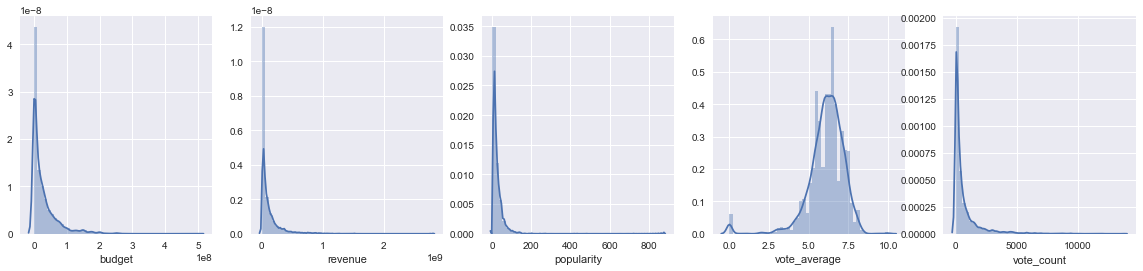

In [6]:
fig, ax=plt.subplots(1,5,figsize=(20,4))
sns.distplot(combined_df.budget, ax=ax[0])
sns.distplot(combined_df.revenue, ax=ax[1])
sns.distplot(combined_df.popularity, ax=ax[2])
sns.distplot(combined_df.vote_average, ax=ax[3])
sns.distplot(combined_df.vote_count, ax=ax[4])

Lambda: 0.263217
3938


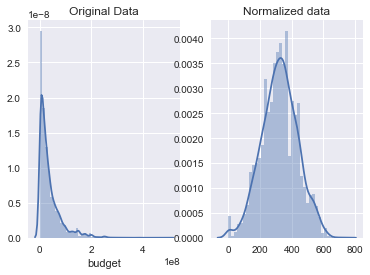

In [7]:
# get only positive pledges (using their indexes)
budget_to_norm = combined_df.budget > 0
positive_budget = combined_df.budget.loc[budget_to_norm]
# normalize the pledges (w/ Box-Cox)
normalized_budget, lam = stats.boxcox(positive_budget)
print('Lambda: %f' % lam)
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_budget, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_budget, ax=ax[1])
ax[1].set_title("Normalized data")
print(len(normalized_budget))

Text(0.5,1,'Probplot after Box-Cox transformation')

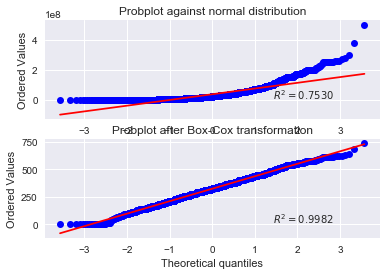

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x= positive_budget
stats.probplot(x, dist=stats.norm, plot=ax1,rvalue=True)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt = normalized_budget
stats.probplot(xt, dist=stats.norm, plot=ax2,rvalue=True)
ax2.set_title('Probplot after Box-Cox transformation')

In [9]:
budget_df = combined_df.loc[combined_df['budget']!=0]
budget_df['normalized_budget'] = pd.Series(normalized_budget, index=budget_df.index)
budget_df = budget_df.reset_index()
del budget_df['index']
budget_df.head(1)

/anaconda3/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,overview,normalized_budget
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",604.425752


3370


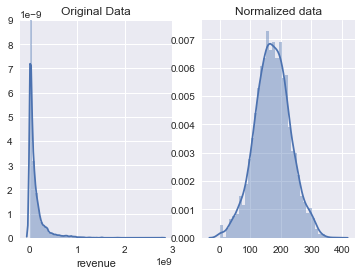

In [10]:
revenue_to_norm = budget_df.revenue > 0
positive_revenue = budget_df.revenue.loc[revenue_to_norm]
normalized_revenue = stats.boxcox(positive_revenue)[0]
fig, ax=plt.subplots(1,2)
sns.distplot(positive_revenue, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_revenue, ax=ax[1])
ax[1].set_title("Normalized data")
print(len(normalized_revenue))

Text(0.5,1,'Probplot after Box-Cox transformation')

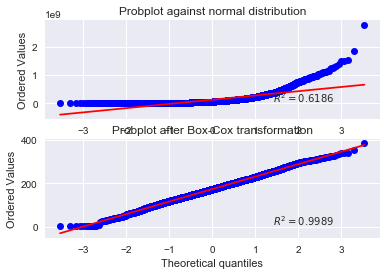

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x= positive_revenue
stats.probplot(x, dist=stats.norm, plot=ax1,rvalue=True)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt = normalized_revenue
stats.probplot(xt, dist=stats.norm, plot=ax2,rvalue=True)
ax2.set_title('Probplot after Box-Cox transformation')

In [12]:
revenue_df = budget_df.loc[budget_df['revenue']!=0]
revenue_df['normalized_revenue'] = pd.Series(normalized_revenue, index=revenue_df.index)
len(revenue_df)

/anaconda3/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3370

3370


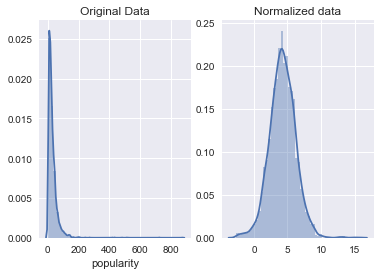

In [13]:
popularity_to_norm = revenue_df.popularity > 0
positive_popularity = revenue_df.popularity.loc[popularity_to_norm]
normalized_popularity = stats.boxcox(positive_popularity)[0]
fig, ax=plt.subplots(1,2)
sns.distplot(positive_popularity, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_popularity, ax=ax[1])
ax[1].set_title("Normalized data")
print(len(normalized_popularity))

Text(0.5,1,'Probplot after Box-Cox transformation')

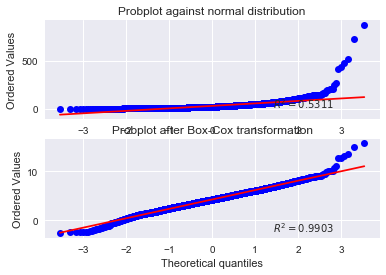

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x= positive_popularity
stats.probplot(x, dist=stats.norm, plot=ax1,rvalue=True)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt = normalized_popularity
stats.probplot(xt, dist=stats.norm, plot=ax2,rvalue=True)
ax2.set_title('Probplot after Box-Cox transformation')

In [15]:
polularity_df = revenue_df.loc[revenue_df['popularity']!=0]
polularity_df['normalized_popularity'] = pd.Series(normalized_popularity, index=revenue_df.index)
polularity_df = polularity_df.reset_index()
del polularity_df['index']
len(polularity_df)

3370

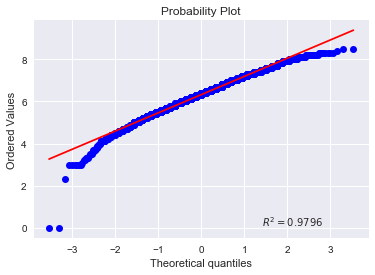

In [16]:
x= polularity_df.vote_average
stats.probplot(x, dist="norm", plot=pylab,rvalue=True)
pylab.show()

In [17]:
low,high = polularity_df.vote_average.quantile([0.01, 0.99])
filt_vote_df = polularity_df.query('{low}<vote_average<{high}'.format(low=low,high=high))
clean_df = filt_vote_df.reset_index()
del clean_df['index']
print(len(clean_df))

3284


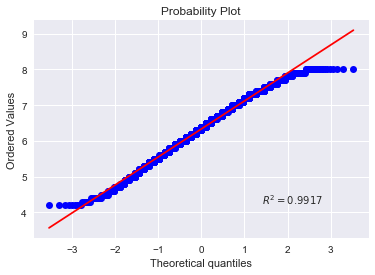

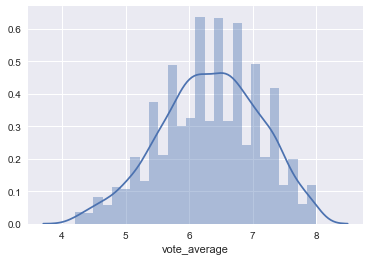

In [18]:
x= clean_df.vote_average
stats.probplot(x, dist="norm", plot=pylab,rvalue=True)
pylab.show()
sns.distplot(clean_df.vote_average)

In [19]:
#runs vader
compound_score =[]
for index, row in clean_df.iterrows():
    try:
        results = analyzer.polarity_scores(clean_df["overview"][index])
        comp = results["compound"] 
        compound_score.append(comp)
    except:
        comp=None
        compound_score.append(comp)     
clean_df["compound_score"] = compound_score

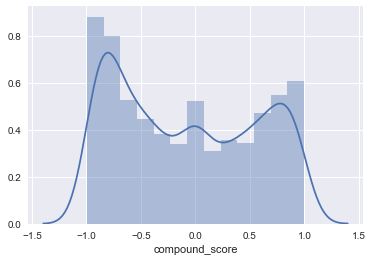

In [20]:
sns.distplot(clean_df.dropna(axis=0, subset=['compound_score']).compound_score)

In [21]:
year = []
month = []
for index,row in clean_df.iterrows():
    year.append(row["release_date"].year)
    month.append(row["release_date"].month)
clean_df['released_year'] = year
clean_df['released_month'] = month
clean_df.to_csv("movies_full_info.csv", index=False, header=True)

In [22]:
year_bins = [1916,1920,1930, 1940, 1950, 1960, 1970,1980,1990,2000,2010,2018]
group_names = ["1910s","1920s", "1930s", "1940s", "1950s","1960s","1970s","1980s","1990s","2000s","2010s"]
clean_df["decade"] = pd.cut(clean_df["released_year"], year_bins,labels=group_names)
clean_df.head(1)
len(clean_df)

3284

In [23]:
budget_bins  = [0,1000000, 10000000, 50000000, 100000000, 250000000, 500000001]
group_names = ["<1M", "1M-10M", "10M-50M", "50M - 100M", "100M - 250M",">250M"]
clean_df["Budget_Breakdown"] = pd.cut(clean_df["budget"], budget_bins, labels=group_names)

revenue_bins = [0,10000000, 50000000, 100000000, 500000000, 3000000000]
group_names = ["<10M", "10M-50M", "50M - 100M", "100M - 500M",">500M"]
clean_df["Revenue_Breakdown"] = pd.cut(clean_df["revenue"], revenue_bins, labels=group_names)

In [24]:
#Unique genres list
unique_genres = []
for i in range(len(clean_df)):
     for j in range(len(clean_df["genres"][i])):
        if clean_df["genres"][i][j] not in unique_genres:
            unique_genres.append(clean_df["genres"][i][j])

In [412]:
genre_dict={
    "Action":[],
    'Adventure':[],
     'Fantasy':[],
     'Science Fiction':[],
     'Crime':[],
     'Drama':[],
     'Thriller':[],
     'Animation':[],
     'Family':[],
     'Western':[],
     'Comedy':[],
     'Romance':[],
     'Horror':[],
     'Mystery':[],
     'History':[],
     'War':[],
     'Music':[],
     'Documentary':[],
     'Foreign':[]
}

for index,row in clean_df.iterrows():
    glist = row["genres"]
    for i in glist:
        for j in range(len(unique_genres)):
            if i == unique_genres[j]:
                genre_dict[unique_genres[j]].append(row)
                
Action_df=pd.DataFrame(genre_dict["Action"]).reset_index()
Adventure_df=pd.DataFrame(genre_dict['Adventure']).reset_index()
Fantasy_df=pd.DataFrame(genre_dict['Fantasy']).reset_index()
Science_Fiction_df=pd.DataFrame(genre_dict['Science Fiction']).reset_index()
Crime_df=pd.DataFrame(genre_dict['Crime']).reset_index()
Drama_df=pd.DataFrame(genre_dict['Drama']).reset_index()
Thriller_df=pd.DataFrame(genre_dict['Thriller']).reset_index()
Animation_df=pd.DataFrame(genre_dict['Animation']).reset_index()
Family_df=pd.DataFrame(genre_dict['Family']).reset_index()
Western_df=pd.DataFrame(genre_dict['Western']).reset_index()
Comedy_df=pd.DataFrame(genre_dict['Comedy']).reset_index()
Romance_df=pd.DataFrame(genre_dict['Romance']).reset_index()
Horror_df=pd.DataFrame(genre_dict['Horror']).reset_index()
Mystery_df=pd.DataFrame(genre_dict['Mystery']).reset_index()
History_df=pd.DataFrame(genre_dict['History']).reset_index()
War_df=pd.DataFrame(genre_dict['War']).reset_index()
Music_df=pd.DataFrame(genre_dict['Music']).reset_index()
Documentary_df=pd.DataFrame(genre_dict['Documentary']).reset_index()
Foreign_df=pd.DataFrame(genre_dict['Foreign']).reset_index()

In [26]:
unique_companies = []
for index,row in clean_df.iterrows():
    for i in row["production_companies"]:
        if i not in unique_companies:
            unique_companies.append(i)
len(unique_companies)

3667

In [27]:
Warner = [name for name in unique_companies if "Warner Bros" in name]
DreamWorks = [name for name in unique_companies if "DreamWorks" in name and "Oriental" not in name]
Sony = [name for name in unique_companies if "Sony" in name]
Walt_Disney = [name for name in unique_companies if "Walt Disney" in name]
Universal_Pictures = [name for name in unique_companies if "Universal Pictures" in name]
Paramount = [name for name in unique_companies if "Paramount" in name]
Fox = [name for name in unique_companies if "Fox" in name and "Foxtor" not in name]
Mayer = [name for name in unique_companies if "Mayer" in name]
Lionsgate = [name for name in unique_companies if "Lionsgate" in name]
Weinstein = [name for name in unique_companies if "Weinstein" in name]
Columbia = [name for name in unique_companies if "Columbia" in name and "British" not in name and "Gaumont" not in name]

In [28]:
for index,row in clean_df.iterrows():
    for n,i in enumerate(row["production_companies"]):
        if i in Warner:
            row["production_companies"][n] = 'Warner Bros Pictures'
        elif i in DreamWorks:
            row["production_companies"][n] = 'DreamWorks Pictures'
        elif i in Sony:
            row["production_companies"][n] = 'Sony Pictures'
        elif i in Walt_Disney:
            row["production_companies"][n] = 'Walt Disney Pictures'
        elif i in Universal_Pictures:
            row["production_companies"][n] = 'Universal Pictures'
        elif i in Paramount:
            row["production_companies"][n] = 'Paramount Pictures'
        elif i in Fox:
            row["production_companies"][n] = 'Twentieth Century Fox Film'
        elif i in Mayer:
            row["production_companies"][n] = 'Metro Goldwyn Mayer Pictures'
        elif i in Lionsgate:
            row["production_companies"][n] = 'Lionsgate'
        elif i in Weinstein:
            row["production_companies"][n] = 'The Weinstein Company'
        elif i in Columbia:
            row["production_companies"][n] = 'Columbia Pictures'

In [29]:
unique_companies1 = []
for index,row in clean_df.iterrows():
    for i in row["production_companies"]:
        if i not in unique_companies1:
            unique_companies1.append(i)
len(unique_companies1)

3612

In [30]:
company_counter = [0 for n in range(len(unique_companies1))]
for index,row in clean_df.iterrows():
    for i in range(len(row["production_companies"])): 
        for j in range(len(unique_companies1)):
            if row["production_companies"][i] == unique_companies1[j]:
                company_counter[j]+=1
companies_dict = dict(zip(unique_companies1, company_counter))

In [31]:
import collections
top = collections.Counter(companies_dict).most_common(11)
company_df = pd.DataFrame(top)
company_df = company_df.rename(columns={0:"Company",1:"Film No."})
print(company_df['Film No.'].sum()/3284)
company_df

0.6431181485992692


,Company,Film No.
0,Twentieth Century Fox Film,325
1,Warner Bros Pictures,301
2,Universal Pictures,277
3,Paramount Pictures,267
4,Columbia Pictures,260
5,Walt Disney Pictures,142
6,New Line Cinema,141
7,DreamWorks Pictures,114
8,Relativity Media,100
9,Metro Goldwyn Mayer Pictures,94


In [32]:
top_company = company_df['Company'].tolist()
top_companies_dict = dict(zip(top_company, [[] for n in range(len(top_company))]))
for index,row in clean_df.iterrows():
    for i in row["production_companies"]:
        for j in range(len(top_company)):
            if i == top_company[j]:
                top_companies_dict[top_company[j]].append(row)

In [33]:
for name in top_company:
    name_new = name.replace(" ", "_") + "_df"
    print(name_new)
    globals()[name_new] = pd.DataFrame(top_companies_dict[name]).reset_index()

Twentieth_Century_Fox_Film_df
Warner_Bros_Pictures_df
Universal_Pictures_df
Paramount_Pictures_df
Columbia_Pictures_df
Walt_Disney_Pictures_df
New_Line_Cinema_df
DreamWorks_Pictures_df
Relativity_Media_df
Metro_Goldwyn_Mayer_Pictures_df
Touchstone_Pictures_df


In [555]:
compound_bins = [-1,0,1]
group_names = ["negative","positive"]
clean_df["attitude"] = pd.cut(clean_df["compound_score"], compound_bins,labels=group_names)
clean_df.head(1)

,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,...,normalized_budget,normalized_revenue,normalized_popularity,compound_score,released_year,released_month,decade,Budget_Breakdown,Revenue_Breakdown,attitude
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,7.2,11800,...,604.425752,383.359338,9.17159,-0.3612,2009,12,2000s,100M - 250M,>500M,negative


In [556]:
clean_df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,normalized_budget,normalized_revenue,normalized_popularity,compound_score,released_year,released_month
count,3.284000e+03,3284.000000,3.284000e+03,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000
mean,4.152909e+07,27.931291,1.243768e+08,110.694884,6.331121,987.961632,337.775544,173.280866,4.254843,-0.082551,2002.465895,6.973812
std,4.584550e+07,32.865248,1.907845e+08,20.485802,0.786363,1387.481423,110.005905,57.107803,1.876857,0.635892,13.243234,3.367244
min,4.000000e+00,0.019984,5.000000e+00,41.000000,4.200000,1.000000,1.673010,1.898914,-2.620163,-0.995700,1916.000000,1.000000
25%,1.100000e+07,10.438395,1.729998e+07,97.000000,5.800000,189.000000,267.283631,135.419991,3.072692,-0.697525,1999.000000,4.000000
50%,2.600000e+07,19.932636,5.670852e+07,107.000000,6.400000,489.000000,336.166330,173.086899,4.239725,-0.128000,2006.000000,7.000000
75%,5.500000e+07,36.370649,1.492737e+08,121.000000,6.900000,1170.250000,410.279580,211.155651,5.484890,0.526700,2011.000000,10.000000
max,5.000000e+08,875.581305,2.787965e+09,338.000000,8.000000,11800.000000,736.496069,383.359338,15.683659,0.995800,2017.000000,12.000000


In [557]:
film_number = clean_df.groupby('decade')['original_title'].count()
revenue_sum = clean_df.groupby('decade')['revenue'].sum()/1000000
revenue_median = clean_df.groupby('decade')['revenue'].median()/1000000
revenue_mean = clean_df.groupby('decade')['revenue'].mean()/1000000
normalized_revenue_sum = clean_df.groupby('decade')['normalized_revenue'].sum()
budget_sum = clean_df.groupby('decade')['budget'].sum()/1000000
budget_median = clean_df.groupby('decade')['budget'].median()/1000000
budget_mean = clean_df.groupby('decade')['budget'].mean()/1000000
normalized_budget_sum = clean_df.groupby('decade')['normalized_budget'].sum()
vote_mean = clean_df.groupby('decade')['vote_average'].mean()
popularity_mean = clean_df.groupby('decade')['popularity'].mean()
normalized_popularity_mean = clean_df.groupby('decade')['normalized_popularity'].mean()
compound_mean = clean_df.groupby('decade')['compound_score'].mean()
film = pd.DataFrame(np.column_stack([compound_mean,revenue_mean,budget_mean,revenue_median,budget_median,film_number,revenue_sum,normalized_revenue_sum,budget_sum,normalized_budget_sum,vote_mean,popularity_mean,normalized_popularity_mean]),
                                  columns=['compound_mean','Mean Revenue(M)','Mean Budget(M)','Median Revenue(M)','Median Budget(M)','Film number','Total Revenue(M)','normalized_revenue_sum','Total Budget(M)','normalized_budget_sum','vote_mean','popularity_mean','normalized_popularity_mean'])
film.set_index(clean_df.groupby('decade')['decade'].unique().str.get(0), inplace=True)
film = film.iloc[1:]
film

,compound_mean,Mean Revenue(M),Mean Budget(M),Median Revenue(M),Median Budget(M),Film number,Total Revenue(M),normalized_revenue_sum,Total Budget(M),normalized_budget_sum,vote_mean,popularity_mean,normalized_popularity_mean
decade,,,,,,,,,,,,,
1920s,0.520725,8.752106,24.298500,6.179000,2.164500,4.0,35.008422,427.047627,97.194000,878.087276,6.525000,10.647565,1.923896
1930s,0.241619,52.350065,1.521948,6.716551,1.494212,16.0,837.601038,2040.563636,24.351163,2286.579151,6.843750,20.900942,2.949569
1940s,0.305053,24.585810,2.307811,8.000000,2.100000,17.0,417.958774,2107.714998,39.232785,2905.927881,6.947059,11.945603,2.218091
1950s,-0.088783,16.742188,2.992376,12.200000,3.000000,23.0,385.070324,3003.077554,68.824648,4146.541520,6.973913,10.686643,2.529728
1960s,-0.156013,38.062289,6.989937,18.999718,3.900000,63.0,2397.924212,8895.536089,440.366033,13497.674737,6.909524,17.119224,3.225596
1970s,-0.226932,70.463584,10.381763,31.899000,5.500000,81.0,5707.550282,13022.950779,840.922794,18151.871541,6.808642,22.615088,3.949330
1980s,-0.208162,91.715133,17.634525,43.984230,14.000000,205.0,18801.602347,34553.684684,3615.077523,57667.951810,6.552683,22.954156,4.004343
1990s,-0.114268,108.686415,38.624169,50.752337,30.000000,599.0,65103.162733,102098.930074,23135.877510,204516.298449,6.328548,21.432972,3.798650
2000s,-0.053410,117.427428,44.151622,57.734771,30.000000,1366.0,160405.867269,235335.593722,60311.115636,477982.022565,6.242753,25.110708,4.140027


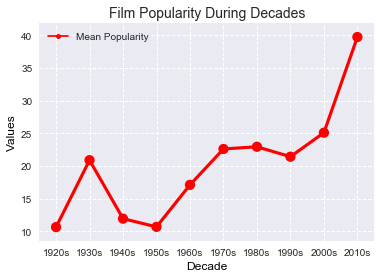

In [558]:
film_rating = film.loc[:, ['vote_mean','popularity_mean','compound_mean']]

fig, ax = plt.subplots(figsize=(6,4))
ax2 = sns.pointplot(x=film_rating.index, y=film_rating['popularity_mean'],color = 'red' )
#ax3 = sns.pointplot(x=film_rating.index, y=film_rating['compound_mean'],color = 'yellow' )
plt.title('Film Popularity During Decades',fontsize=14)
ax.set_ylabel(r"Values", fontsize=12, color="black")
ax.set_xlabel(r"Decade",fontsize=12, color="black")
plt.grid(linestyle = '--', linewidth = 1)

r_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Mean Popularity')

plt.legend(handles=[r_line])
plt.show()
fig.savefig('figp.png', bbox_inches='tight')

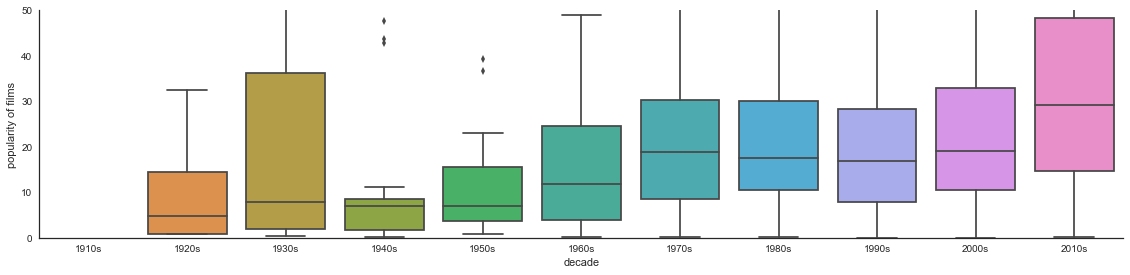

In [559]:
with sns.axes_style('white'):
    g = sns.factorplot("decade",'popularity', data=clean_df, aspect=4.0, kind='box')
    g.set_ylabels('popularity of films')
    plt.ylim(0, 50)
 

In [560]:
film_market = film.loc[:, ['Film number','Mean Revenue(M)','Mean Budget(M)','Total Budget(M)','Total Revenue(M)']]
film_market

,Film number,Mean Revenue(M),Mean Budget(M),Total Budget(M),Total Revenue(M)
decade,,,,,
1920s,4.0,8.752106,24.298500,97.194000,35.008422
1930s,16.0,52.350065,1.521948,24.351163,837.601038
1940s,17.0,24.585810,2.307811,39.232785,417.958774
1950s,23.0,16.742188,2.992376,68.824648,385.070324
1960s,63.0,38.062289,6.989937,440.366033,2397.924212
1970s,81.0,70.463584,10.381763,840.922794,5707.550282
1980s,205.0,91.715133,17.634525,3615.077523,18801.602347
1990s,599.0,108.686415,38.624169,23135.877510,65103.162733
2000s,1366.0,117.427428,44.151622,60311.115636,160405.867269


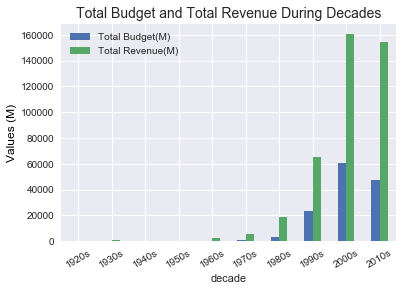

In [565]:
film1 = film.loc[:, ['Total Budget(M)','Total Revenue(M)']]
film1.plot.bar(x=film1.index)
plt.title('Total Budget and Total Revenue During Decades',fontsize=14)
plt.xticks(rotation=30)
plt.ylabel(r"Values (M)", fontsize=12, color="black")
fig.savefig('fig1.png', bbox_inches='tight')

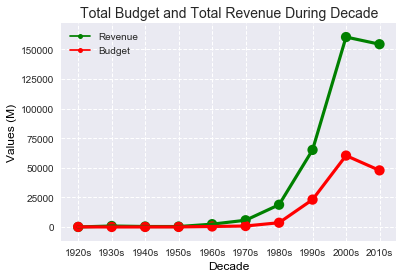

In [566]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(6,4))
ax1 = sns.pointplot(x=film1.index, y=film1['Total Revenue(M)'],color = 'green',label ='Revenue' )
ax2 = sns.pointplot(x=film1.index, y=film1['Total Budget(M)'],color = 'red',label ='Budget' )
plt.title('Total Budget and Total Revenue During Decade',fontsize=14)
ax.set_ylabel(r"Values (M)", fontsize=12, color="black")
ax.set_xlabel(r"Decade",fontsize=12, color="black")
plt.grid(linestyle = '--', linewidth = 1)
g_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=5, label='Revenue')
r_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Budget')
plt.legend(handles=[g_line,r_line])
plt.show()
fig.savefig('fig2.png', bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

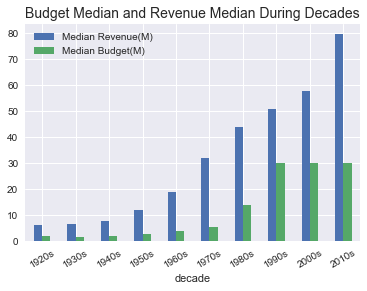

In [581]:
film2 = film.loc[:, ['Median Revenue(M)','Median Budget(M)']]
film2.plot.bar(x=film2.index)
plt.title('Budget Median and Revenue Median During Decades',fontsize=14)
plt.xticks(rotation=30)

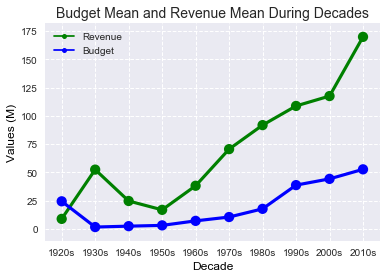

In [569]:
film3 = film.loc[:, ['Mean Revenue(M)','Mean Budget(M)']]
fig, ax = plt.subplots(figsize=(6,4))
ax1 = sns.pointplot(x=film3.index, y=film3['Mean Revenue(M)'],color = 'green',label ='Revenue' )
ax2 = sns.pointplot(x=film3.index, y=film3['Mean Budget(M)'],color = 'blue',label ='Budget' )
plt.title('Budget Mean and Revenue Mean During Decades',fontsize=14)
ax.set_ylabel(r"Values (M)", fontsize=12, color="black")
ax.set_xlabel(r"Decade",fontsize=12, color="black")
plt.grid(linestyle = '--', linewidth = 1)
g_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=5, label='Revenue')
r_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Budget')
plt.legend(handles=[g_line,r_line])
plt.show()
fig.savefig('fig4.png', bbox_inches='tight')

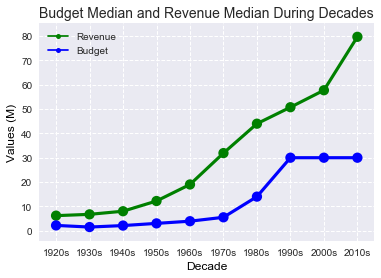

In [582]:
film3 = film.loc[:, ['Median Revenue(M)','Median Budget(M)']]
fig, ax = plt.subplots(figsize=(6,4))
ax1 = sns.pointplot(x=film3.index, y=film3['Median Revenue(M)'],color = 'green',label ='Revenue' )
ax2 = sns.pointplot(x=film3.index, y=film3['Median Budget(M)'],color = 'blue',label ='Budget' )
plt.title('Budget Median and Revenue Median During Decades',fontsize=14)
ax.set_ylabel(r"Values (M)", fontsize=12, color="black")
ax.set_xlabel(r"Decade",fontsize=12, color="black")
plt.grid(linestyle = '--', linewidth = 1)
g_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=5, label='Revenue')
r_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Budget')
plt.legend(handles=[g_line,r_line])
plt.show()
fig.savefig('fig4.png', bbox_inches='tight')

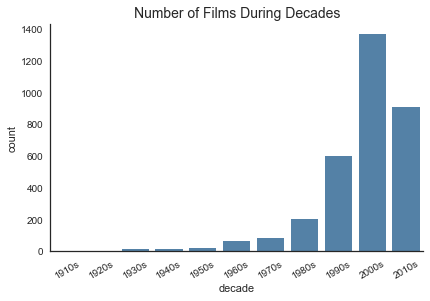

In [570]:
with sns.axes_style('white'):
    g = sns.factorplot("decade", data=clean_df, aspect=1.5,
                       kind="count", color='steelblue')
    g.set_xticklabels(rotation=30)
    plt.title('Number of Films During Decades',fontsize=14)
    
fig.savefig('fig1.png', bbox_inches='tight')

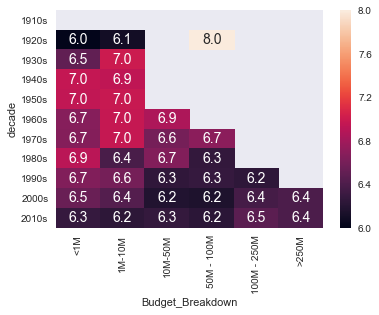

In [571]:
df = clean_df.pivot_table(index='decade', columns='Budget_Breakdown', values='vote_average', aggfunc=np.mean)
sns.heatmap(df, annot=True, fmt=".1f")

In [572]:
recent_df1.head(1)

,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,overview,normalized_budget,normalized_revenue,normalized_popularity,compound_score,released_year,released_month,decade,Budget_Breakdown,Revenue_Breakdown
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",604.425752,383.359338,9.17159,-0.3612,2009,12,2000s,100M - 250M,>500M


2874

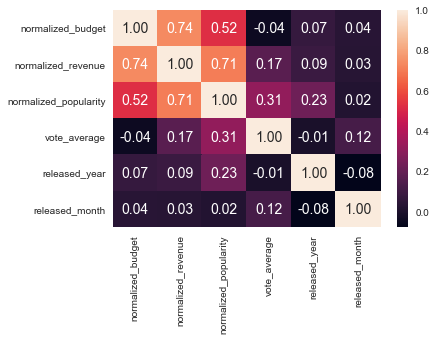

In [573]:
recent_df1 = clean_df.loc[clean_df['released_year']>1990]
recent_df2 = recent_df1.loc[:, ['normalized_budget','normalized_revenue','normalized_popularity','vote_average','released_year','released_month']]
corr = recent_df2.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
fig.savefig('fig1.png', bbox_inches='tight')
len(recent_df1)

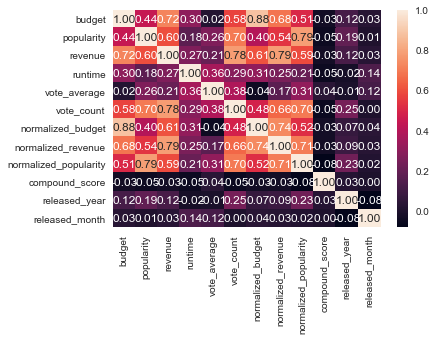

In [318]:
corr = recent_df1.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

Text(0.5,1,'Side-by-Side Histogram with decade')

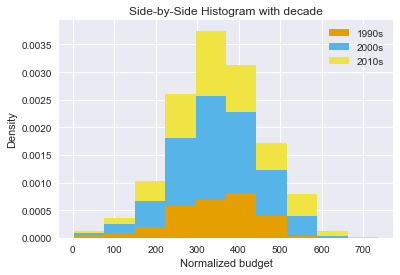

In [574]:
x1 = list(clean_df[clean_df['decade'] == '1990s']['normalized_budget'])
x2 = list(clean_df[clean_df['decade'] == '2000s']['normalized_budget'])
x3 = list(clean_df[clean_df['decade'] == '2010s']['normalized_budget'])
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['1990s', '2000s', '2010s']
#plt.hist([x1, x2, x3], normed=True,color = colors, label=names)
plt.hist([x1, x2, x3], stacked=True,normed=True, color = colors, label=names,log=False)
plt.legend()
plt.figsize=(20,8)
plt.savefig('test2png.png', dpi=100)
plt.xlabel('Normalized budget')
plt.ylabel('Density')
plt.title('Side-by-Side Histogram with decade')

Text(0,0.5,'Density')

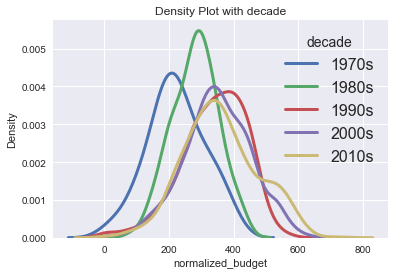

In [583]:
times = ['1970s','1980s','1990s', '2000s', '2010s']
for time in times:
    subset = clean_df[clean_df['decade'] == time]
    sns.distplot(subset['normalized_budget'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = time)
plt.legend(prop={'size': 16}, title = 'decade')
plt.title('Density Plot with decade')
plt.xlabel('normalized_budget')
plt.ylabel('Density')

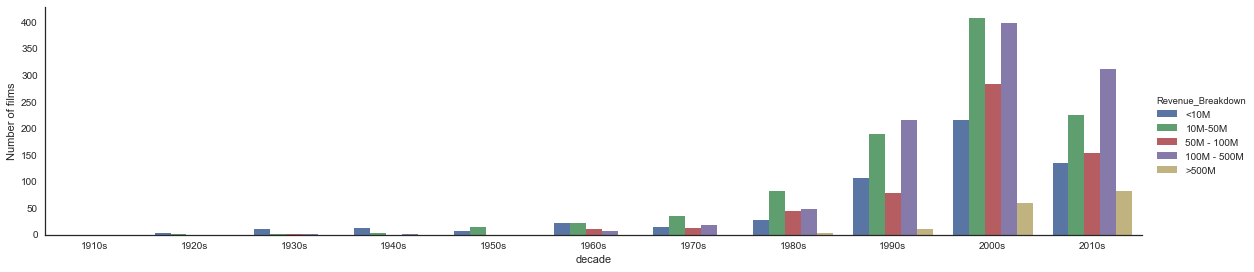

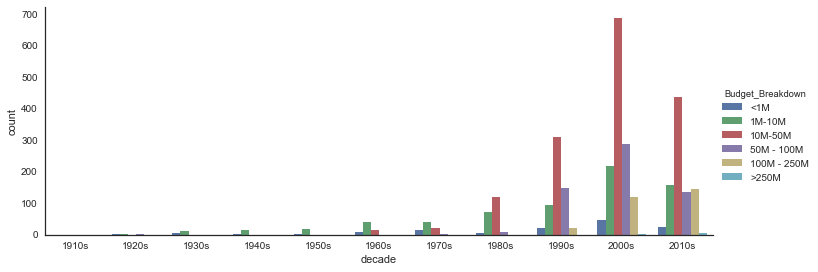

In [584]:
with sns.axes_style('white'):
    g1 = sns.factorplot("decade", data=clean_df, aspect=4.0, kind='count',
                       hue='Revenue_Breakdown')
    g2 = sns.factorplot("decade", data=clean_df, aspect=2.5, kind='count',
                       hue='Budget_Breakdown')
    g1.set_ylabels('Number of films')

In [585]:
# mean vote average VS time(decades) as line graph
df_t = clean_df.pivot_table(index='decade',columns='Budget_Breakdown',aggfunc={'vote_average':['mean','median']})
df_t.columns = df_t.columns.droplevel(0)
df_t

mean                                                   \
Budget_Breakdown       <1M    1M-10M   10M-50M 50M - 100M 100M - 250M >250M   
decade                                                                        
1920s             6.000000  6.100000       NaN   8.000000         NaN   NaN   
1930s             6.500000  7.000000       NaN        NaN         NaN   NaN   
1940s             6.966667  6.942857       NaN        NaN         NaN   NaN   
1950s             6.950000  6.978947       NaN        NaN         NaN   NaN   
1960s             6.675000  6.973171  6.857143        NaN         NaN   NaN   
1970s             6.664286  6.976190  6.600000   6.700000         NaN   NaN   
1980s             6.920000  6.384722  6.660504   6.266667         NaN   NaN   
1990s             6.652174  6.595745  6.251768   6.282667    6.242857   NaN   
2000s             6.541304  6.441743  6.174128   6.156747    6.361157   6.4   
2010s             6.284615  6.236943  6.276256   6.227737    6.469863   6.4   

                 median                                              
Budget_Breakdown    <1M 1M-10M 10M-50M 50M - 100M 100M - 250M >250M  
decade                                                               
1920s              6.00   6.10     NaN        8.0         NaN   NaN  
1930s              6.20   7.20     NaN        NaN         NaN   NaN  
1940s              6.80   7.05     NaN        NaN         NaN   NaN  
1950s              7.15   6.90     NaN        NaN         NaN   NaN  
1960s              7.00   7.10     6.8        NaN         NaN   NaN  
1970s              6.75   7.00     6.6        6.7         NaN   NaN  
1980s              6.90   6.45     6.7        6.6         NaN   NaN  
1990s              6.70   6.80     6.3        6.3         6.2   NaN  
2000s              6.60   6.60     6.2        6.1         6.3   6.4  
2010s              6.55   6.30     6.3        6.2         6.5   6.3

No handles with labels found to put in legend.


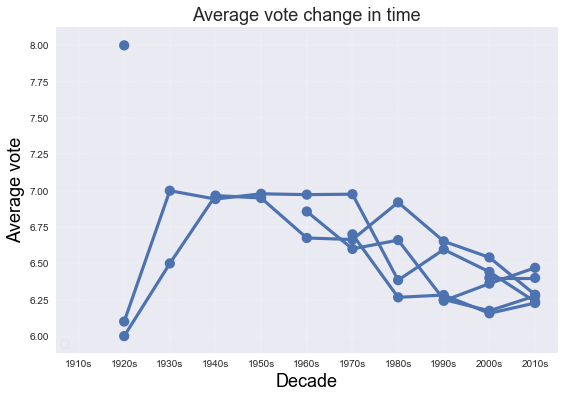

In [586]:
fig, ax = plt.subplots(figsize=(9,6))
for i in range(0,int(len(df_t.columns)/2)):
    x = df_t.index
    y = df_t.iloc[:, i]
    sns.pointplot(x, y,yerr=error,lw=2, capsize=4, markersize=8,label=(list(df_t)[i])[1])
plt.title('Average vote change in time',fontsize=18)
ax.set_ylabel(r"Average vote", fontsize=18, color="black")
ax.set_xlabel(r"Decade",fontsize=18, color="black")
plt.grid(linestyle = '--', linewidth = 0.3)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.legend(loc='lower left', frameon=True)
plt.show()

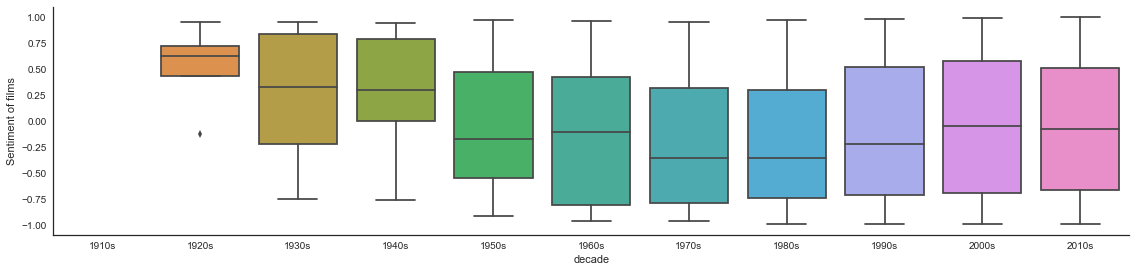

In [587]:
with sns.axes_style('white'):
    g = sns.factorplot("decade",'compound_score', data=clean_df, aspect=4.0, kind='box')
    g.set_ylabels('Sentiment of films')

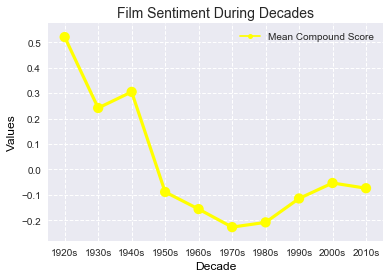

In [588]:
film_rating = film.loc[:, ['vote_mean','popularity_mean','compound_mean']]

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.pointplot(x=film_rating.index, y=film_rating['compound_mean'],color = 'yellow' )
plt.title('Film Sentiment During Decades',fontsize=14)
ax.set_ylabel(r"Values", fontsize=12, color="black")
ax.set_xlabel(r"Decade",fontsize=12, color="black")
plt.grid(linestyle = '--', linewidth = 1)
g_line = mlines.Line2D([], [], color='yellow', marker='o',
                          markersize=5, label='Mean Compound Score')
plt.legend(handles=[g_line])
plt.show()
fig.savefig('figc.png', bbox_inches='tight')

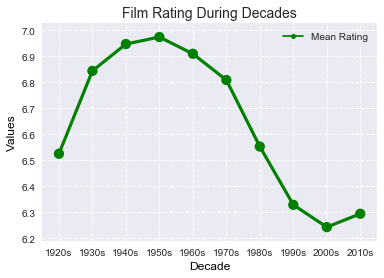

In [589]:
film_rating = film.loc[:, ['vote_mean','popularity_mean','compound_mean']]

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.pointplot(x=film_rating.index, y=film_rating['vote_mean'],color = 'green' )
plt.title('Film Rating During Decades',fontsize=14)
ax.set_ylabel(r"Values", fontsize=12, color="black")
ax.set_xlabel(r"Decade",fontsize=12, color="black")
plt.grid(linestyle = '--', linewidth = 1)
g_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=5, label='Mean Rating')
plt.legend(handles=[g_line])
plt.show()
fig.savefig('figr.png', bbox_inches='tight')

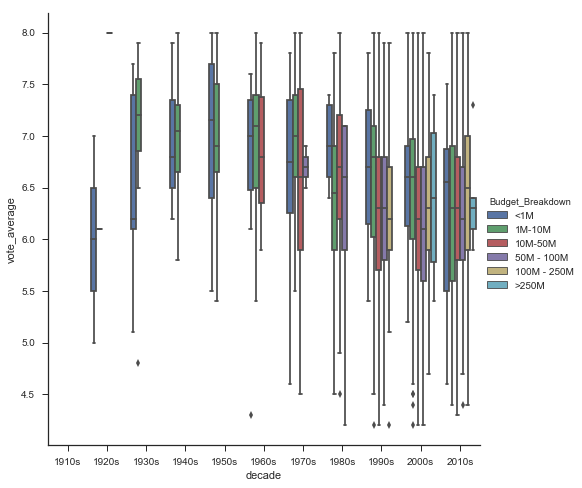

In [590]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("decade", "vote_average", "Budget_Breakdown", data=clean_df, kind="box",size=7)
    g.set_axis_labels("decade", "vote_average");

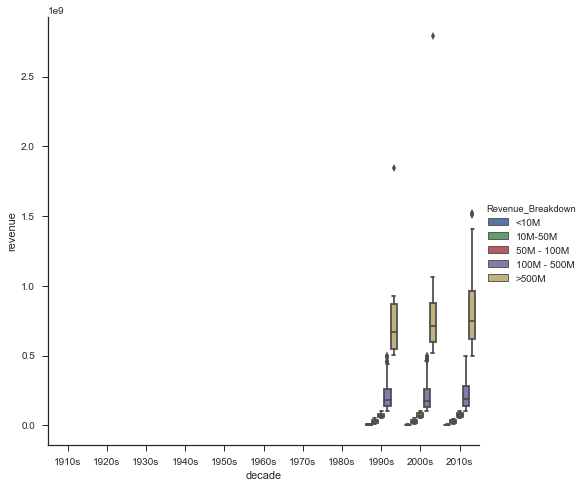

In [655]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("decade", "revenue", "Revenue_Breakdown", data=recent_df1, kind="box",size=7)
    g.set_axis_labels("decade", "revenue");

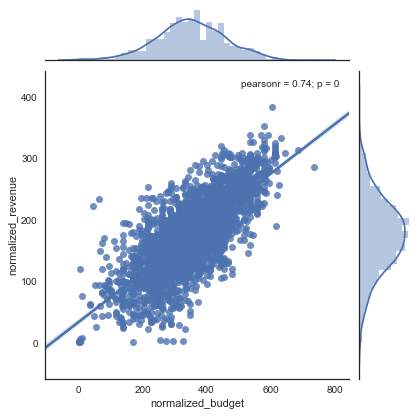

In [592]:
with sns.axes_style('white'):
    sns.jointplot("normalized_budget","normalized_revenue", data=recent_df1, kind='reg');

(-20, 400)

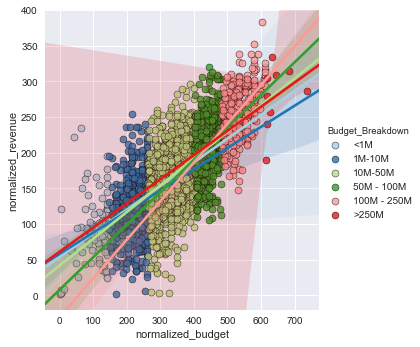

In [675]:
lp = sns.lmplot(data=recent_df1,
                x='normalized_budget', 
                y='normalized_revenue', 
                hue='Budget_Breakdown', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

plt.ylim(-20,400)

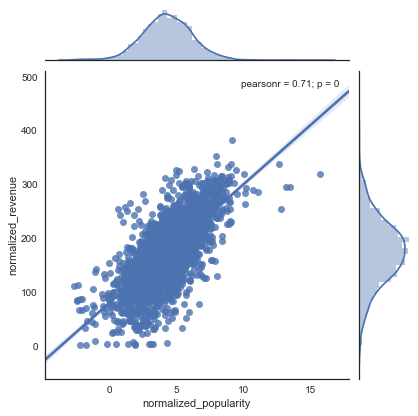

In [594]:
with sns.axes_style('white'):
    sns.jointplot( "normalized_popularity","normalized_revenue", data=recent_df1, kind='reg');

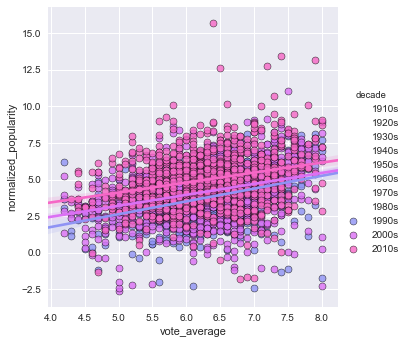

In [677]:
lp = sns.lmplot(data=recent_df1,
                x='vote_average',
                y='normalized_popularity',
                hue='decade', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

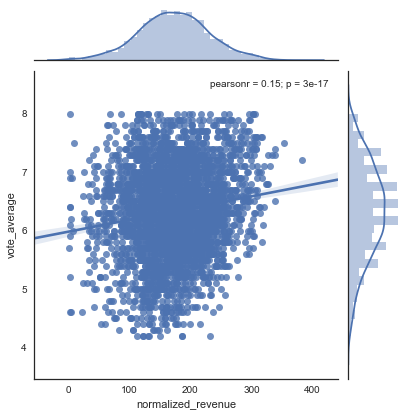

In [596]:
with sns.axes_style('white'):
    sns.jointplot( "normalized_revenue","vote_average", data=clean_df, kind='reg');

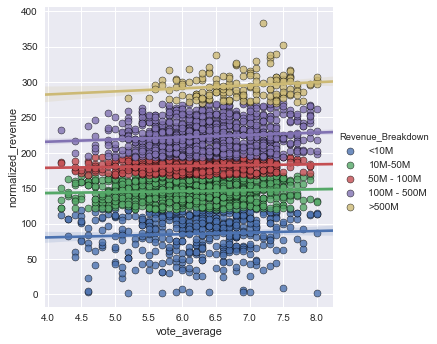

In [597]:
lp = sns.lmplot(data=recent_df1,
                x='vote_average', 
                y='normalized_revenue', 
                hue='Revenue_Breakdown', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

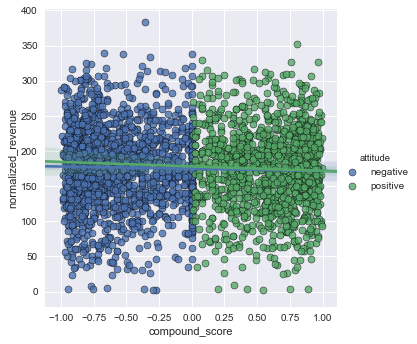

In [601]:
lp = sns.lmplot(data=recent_df1,
                x='compound_score', 
                y='normalized_revenue', 
                hue='attitude', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

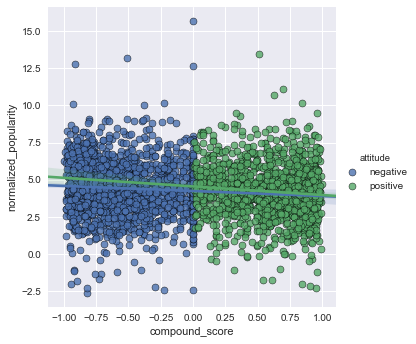

In [602]:
lp = sns.lmplot(data=recent_df1,
                x='compound_score', 
                y='normalized_popularity', 
                hue='attitude', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

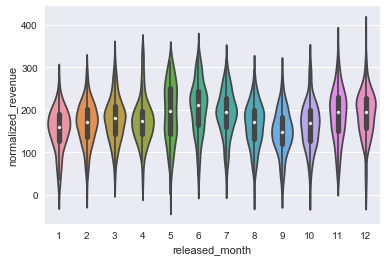

In [603]:
sns.violinplot("released_month", "normalized_revenue", data=recent_df1);

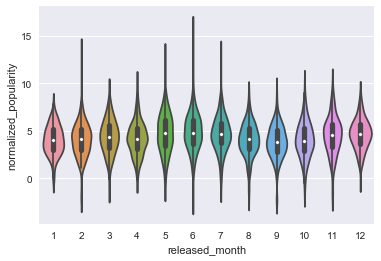

In [604]:
sns.violinplot("released_month", "normalized_popularity", data=recent_df1);

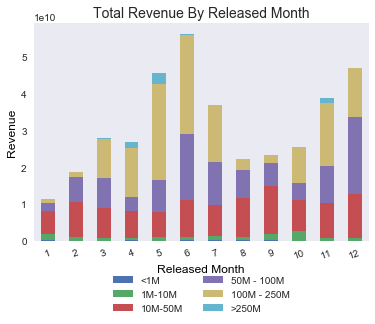

In [605]:
var = recent_df1.groupby(['released_month','Budget_Breakdown']).revenue.sum()
var.unstack().plot(kind='bar',stacked=True,grid=False)
plt.title('Total Revenue By Released Month',fontsize=14)
plt.xticks(rotation=20)
plt.ylabel(r"Revenue", fontsize=12, color="black")
plt.xlabel(r"Released Month", fontsize=12, color="black")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),  shadow=True, ncol=2)
fig.savefig('fig1.png', bbox_inches='tight')

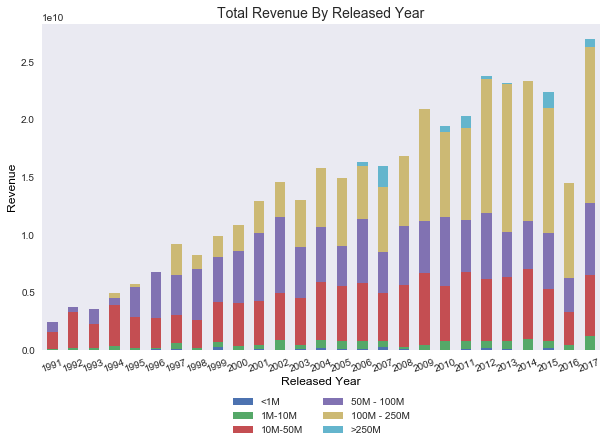

In [606]:
var = recent_df1.groupby(['released_year','Budget_Breakdown']).revenue.sum()
var.unstack().plot(kind='bar',stacked=True,grid=False,figsize=(10, 6))

#plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Total Revenue By Released Year',fontsize=14)
plt.xticks(rotation=20)
plt.ylabel(r"Revenue", fontsize=12, color="black")
plt.xlabel(r"Released Year", fontsize=12, color="black")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),  shadow=True, ncol=2)
fig.savefig('figy.png', bbox_inches='tight')

In [607]:
Action_df['genres'] = 'Action'
Adventure_df['genres'] = 'Adventure'
Fantasy_df['genres'] = 'Fantasy'
Science_Fiction_df['genres'] = 'Science Fiction'
Crime_df['genres'] = 'Crime'
Drama_df['genres'] = 'Drama'
Thriller_df['genres'] = 'Thriller'
Animation_df['genres'] = 'Animation'
Family_df['genres'] = 'Family'
Western_df['genres'] = 'Western'
Comedy_df['genres'] = 'Comedy'
Romance_df['genres'] = 'Romance'
Horror_df['genres'] = 'Horror'
Mystery_df['genres'] = 'Mystery'
History_df['genres'] = 'History'
War_df['genres'] = 'War'
Music_df['genres'] = 'Music'
Documentary_df['genres'] = 'Documentary'
Foreign_df['genres'] = 'Foreign'

In [608]:
genre_df = pd.concat([Action_df,Adventure_df,Fantasy_df,Science_Fiction_df,Crime_df,Drama_df,Thriller_df,Animation_df,Family_df,Western_df,Comedy_df,Romance_df,Horror_df,Mystery_df,History_df,War_df,Music_df,Documentary_df,Foreign_df],axis=0, join='outer',ignore_index=True)
genre_df=genre_df.loc[genre_df['released_year']>1990]
print(len(genre_df))
genre_df.head(1)

7558


,index,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,...,overview,normalized_budget,normalized_revenue,normalized_popularity,compound_score,released_year,released_month,decade,Budget_Breakdown,Revenue_Breakdown
0,0,237000000,Action,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,7.2,...,"In the 22nd century, a paraplegic Marine is di...",604.425752,383.359338,9.17159,-0.3612,2009,12,2000s,100M - 250M,>500M


In [683]:
film_percent = genre_df.groupby('genres')['original_title'].count()*100/7558
revenue_sum = genre_df.groupby('genres')['revenue'].sum()/1000000
revenue_median = genre_df.groupby('genres')['revenue'].median()/1000000
revenue_mean = genre_df.groupby('genres')['revenue'].mean()/1000000
normalized_revenue_sum = genre_df.groupby('genres')['normalized_revenue'].sum()
budget_sum = genre_df.groupby('genres')['budget'].sum()/1000000
budget_median = genre_df.groupby('genres')['budget'].median()/1000000
budget_mean = genre_df.groupby('genres')['budget'].mean()/1000000
normalized_budget_sum = genre_df.groupby('genres')['normalized_budget'].sum()
vote_mean = genre_df.groupby('genres')['vote_average'].mean()
popularity_mean = genre_df.groupby('genres')['popularity'].mean()
normalized_popularity_mean = genre_df.groupby('genres')['normalized_popularity'].mean()
compound_mean = genre_df.groupby('genres')['compound_score'].mean()
genres = pd.DataFrame(np.column_stack([compound_mean,revenue_mean,budget_mean,revenue_median,
                                       budget_median,film_percent,revenue_sum,normalized_revenue_sum,
                                       budget_sum,normalized_budget_sum,vote_mean,popularity_mean,normalized_popularity_mean]),
                                  columns=['compound_mean','Mean Revenue(M)','Mean Budget(M)','Median Revenue(M)',
                                           'Median Budget(M)','Percentage','Total Revenue(M)','normalized_revenue_sum',
                                           'Total Budget(M)','normalized_budget_sum','Mean Rating','Mean Popularity','normalized_popularity_mean'])
genres.set_index(genre_df.groupby('genres')['genres'].unique().str.get(0), inplace=True)
top_genres = genres.sort_values('Percentage',ascending=False)
print(top_genres.Percentage.sum())
print(ten_genres['Total Revenue(M)'].sum()*100/top_genres['Total Revenue(M)'].sum())
ten_genres = top_genres.iloc[0:10]
top_genres

99.99999999999999
87.6701582126572


,compound_mean,Mean Revenue(M),Mean Budget(M),Median Revenue(M),Median Budget(M),Percentage,Total Revenue(M),normalized_revenue_sum,Total Budget(M),normalized_budget_sum,Mean Rating,Mean Popularity,normalized_popularity_mean
genres,,,,,,,,,,,,,
Drama,-0.030140,87.052449,33.364193,41.954997,25.00,16.710770,109947.243591,203419.934808,42138.975856,411129.292063,6.534046,23.722644,4.004371
Comedy,0.124244,120.355915,40.142937,64.269413,30.00,13.257476,120596.626484,175748.727241,40223.223112,345315.365620,6.081836,25.343432,4.099696
Thriller,-0.342580,115.539374,44.709364,62.285480,34.00,11.061127,96590.916697,145657.922028,37377.028476,296749.975290,6.182177,30.555059,4.567579
Action,-0.259289,200.480536,71.884832,106.303988,55.00,10.598042,160584.909296,156812.988615,57579.750214,327745.655050,6.134207,38.902696,4.955538
Adventure,-0.122030,282.957502,90.938830,159.330280,75.00,7.449061,159305.073680,120419.101931,51198.561433,248962.942733,6.212611,46.761887,5.274638
Romance,0.239168,97.959328,31.176632,48.051668,25.00,6.721355,49763.338457,84486.282975,15837.729145,164093.884920,6.330709,22.049889,3.906518
Crime,-0.294226,90.730240,37.071211,51.148651,30.00,6.417042,44004.166358,80624.970200,17979.537364,164787.370064,6.375258,26.692655,4.379445
Science Fiction,-0.181542,220.311120,76.486669,103.039258,60.00,4.855782,80854.181070,72079.138638,28070.607541,150877.762264,6.131063,44.079110,5.168211
Family,0.186777,242.690174,74.045908,140.073390,60.00,4.511776,82757.349350,71613.982074,25249.654783,142916.437487,6.179472,36.231574,4.743615


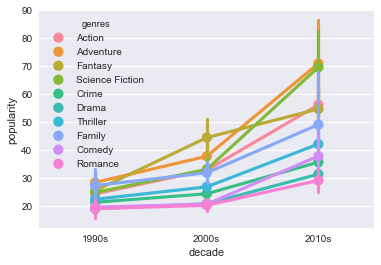

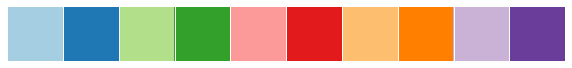

In [673]:
sns.pointplot(x="decade", y="popularity", hue="genres", data=topg_df,order=['1990s','2000s','2010s']
              #palette={"male": "g", "female": "m"},
              #markers=["^", "o"], linestyles=["-", "--"]
             );
sns.set_palette("Paired", 10)
sns.palplot(sns.color_palette())

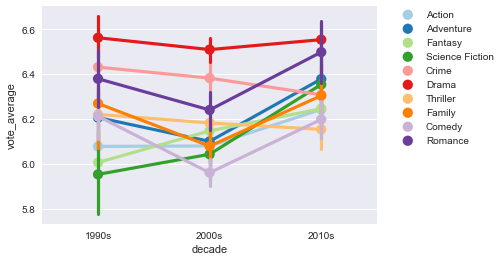

In [688]:
sns.pointplot(x="decade", y="vote_average", hue="genres", data=topg_df,order=['1990s','2000s','2010s']
              #palette={"male": "g", "female": "m"},
              #markers=["^", "o"], linestyles=["-", "--"]
             );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

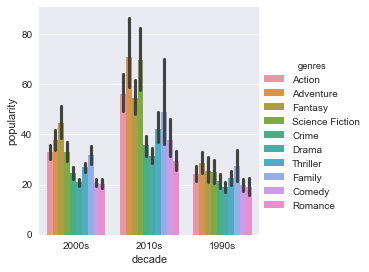

In [665]:
sns.factorplot(x="decade", y="popularity", hue="genres", data=topg_df, kind="bar")

(0, 200)

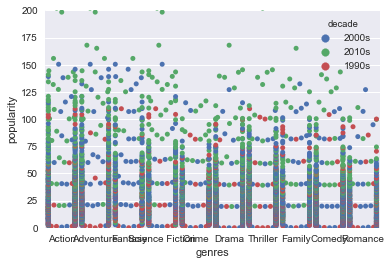

In [671]:
sns.swarmplot(x="genres", y="popularity", hue="decade", data=topg_df);
plt.ylim(0,200)

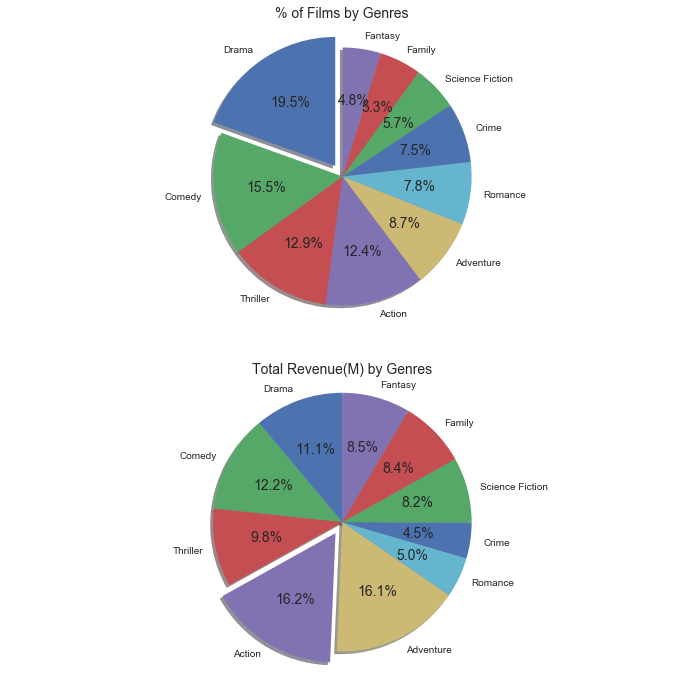

In [619]:
labels = 'Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance','Crime', 'Science Fiction', 'Family', 'Fantasy'
explode1 = (0.1,0,0,0,0,0,0,0,0,0) 
explode2 = (0,0,0,0.1,0,0,0,0,0,0) 
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].pie(ten_genres['Percentage'], explode=explode1,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('% of Films by Genres',fontsize=14)

ax[1].pie(ten_genres['Total Revenue(M)'], explode=explode2,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Total Revenue(M) by Genres',fontsize=14)

plt.rcParams.update({'font.size': 14})
plt.show()

In [532]:
genres_market = ten_genres.loc[:, ['Mean Revenue(M)','Mean Budget(M)','Total Budget(M)','Total Revenue(M)','Mean Rating','Mean Popularity']]
genres_market

,Mean Revenue(M),Mean Budget(M),Total Budget(M),Total Revenue(M),Mean Rating,Mean Popularity
genres,,,,,,
Drama,87.052449,33.364193,42138.975856,109947.243591,6.534046,23.722644
Comedy,120.355915,40.142937,40223.223112,120596.626484,6.081836,25.343432
Thriller,115.539374,44.709364,37377.028476,96590.916697,6.182177,30.555059
Action,200.480536,71.884832,57579.750214,160584.909296,6.134207,38.902696
Adventure,282.957502,90.938830,51198.561433,159305.073680,6.212611,46.761887
Romance,97.959328,31.176632,15837.729145,49763.338457,6.330709,22.049889
Crime,90.730240,37.071211,17979.537364,44004.166358,6.375258,26.692655
Science Fiction,220.311120,76.486669,28070.607541,80854.181070,6.131063,44.079110
Family,242.690174,74.045908,25249.654783,82757.349350,6.179472,36.231574


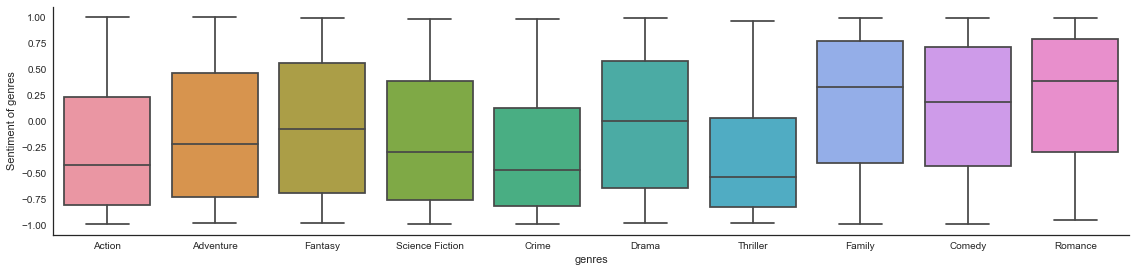

In [538]:
with sns.axes_style('white'): 
    g = sns.factorplot('genres','compound_score', data=topg_df, aspect=4.0, kind='box')
    g.set_ylabels('Sentiment of genres')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

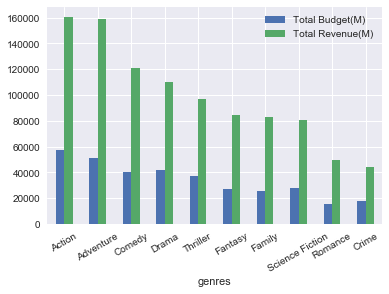

In [540]:
genres_market2 = genres_market.loc[:, ['Total Budget(M)','Total Revenue(M)']]
genres_market3 = genres_market2.sort_values('Total Revenue(M)',ascending=False)
genres_market3.plot.bar(x=genres_market3.index)
plt.xticks(rotation=30)

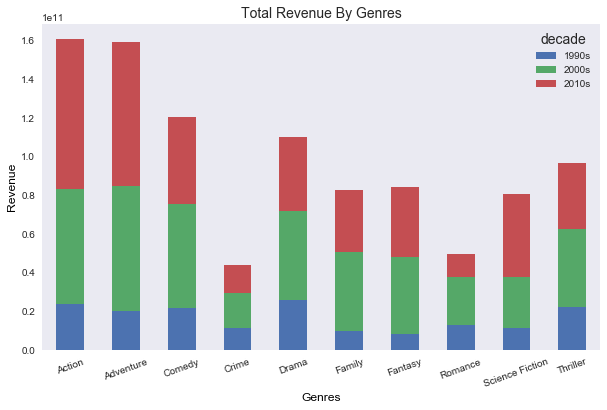

In [537]:
top_list = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Romance','Crime', 'Science Fiction', 'Family', 'Fantasy']
topg_df = genre_df.loc[genre_df['genres'].isin(top_list)]

var = topg_df.groupby(['genres','decade']).revenue.sum()
var.unstack().plot(kind='bar',stacked=True,grid=False,figsize=(10, 6))

#plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Total Revenue By Genres',fontsize=14)
plt.xticks(rotation=20)
plt.ylabel(r"Revenue", fontsize=12, color="black")
plt.xlabel(r"Genres", fontsize=12, color="black")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),  shadow=True, ncol=2)
fig.savefig('figy.png', bbox_inches='tight')

In [544]:
topg_df.head(1)

,index,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,...,overview,normalized_budget,normalized_revenue,normalized_popularity,compound_score,released_year,released_month,decade,Budget_Breakdown,Revenue_Breakdown
0,0,237000000,Action,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,7.2,...,"In the 22nd century, a paraplegic Marine is di...",604.425752,383.359338,9.17159,-0.3612,2009,12,2000s,100M - 250M,>500M


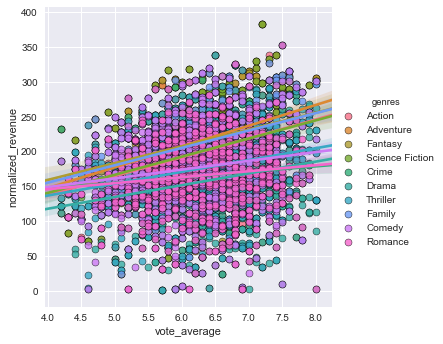

In [547]:
lp = sns.lmplot(data=topg_df,
                x='vote_average', 
                y='normalized_revenue', 
                hue='genres', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

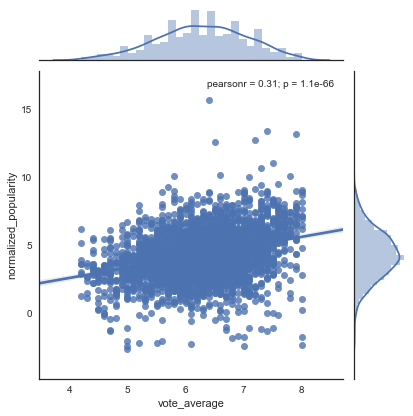

In [622]:
with sns.axes_style('white'):
    sns.jointplot( "vote_average","normalized_popularity", data=recent_df1, kind='reg');

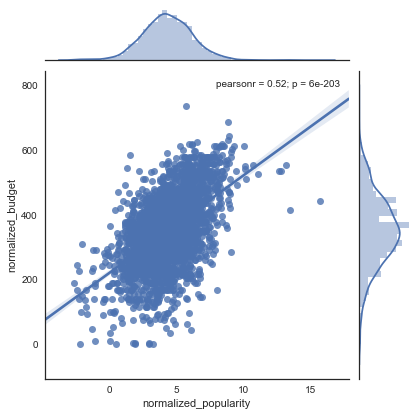

In [649]:
#b_df = recent_df1[(recent_df1['budget']<=250000000) & (recent_df1['budget']>100000000)]

with sns.axes_style('white'):
    sns.jointplot( "normalized_popularity","normalized_budget", data=recent_df1, kind='reg');

(-5, 15)

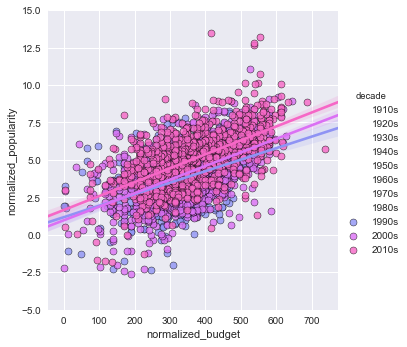

In [685]:
lp = sns.lmplot(data=recent_df1,
                x='normalized_budget', 
                y='normalized_popularity', 
                hue='decade', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

plt.ylim(-5,15)

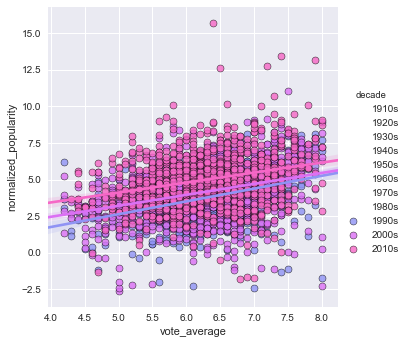

In [641]:
lp = sns.lmplot(data=recent_df1,
                x='vote_average', 
                y='normalized_popularity', 
                hue='decade', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

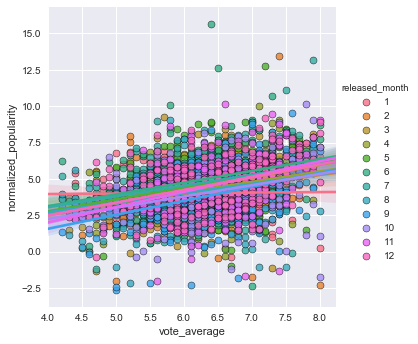

In [692]:
lp = sns.lmplot(data=recent_df1,
                x='vote_average', 
                y='normalized_popularity', 
                hue='released_month', # <== 😀 Look here!
                #palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

In [629]:
recent_df1.head(1)

,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,...,normalized_budget,normalized_revenue,normalized_popularity,compound_score,released_year,released_month,decade,Budget_Breakdown,Revenue_Breakdown,attitude
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,7.2,11800,...,604.425752,383.359338,9.17159,-0.3612,2009,12,2000s,100M - 250M,>500M,negative


In [694]:
now_viq = recent_df1[recent_df1['released_year'] >= 1990]['vote_average']
before_viq = recent_df1[recent_df1['released_year'] < 1990]['vote_average']
stats.ttest_ind(now_viq, before_viq)

Ttest_indResult(statistic=nan, pvalue=nan)

In [695]:
action_viq = Action_df['vote_average']
adventure_viq = Adventure_df['vote_average']
stats.ttest_ind(action_viq, adventure_viq)

Ttest_indResult(statistic=-2.26048460533389, pvalue=0.023926780721123014)